## サマリー

* エンジニア経験年数
  * Stack Overflow（以下、SO）とQiitaを比較すると
    * 未経験はQiitaが約10%少ない
    * 20年以上はQiitaが約10%多い
    * 他はよく似た傾向
* これから学習したい言語（複数回答）
  * SO、Qiita共にトップ5は以下の言語（アルファベット順）
    * Go
    * JavaScript
    * Python
    * Rust
    * TypeScript
* 開発で使用しているエディタ（複数回答）
  * SO、Qiita共にVisual Studio Codeの利用率は80％近くある
    * SO: 74.48%
    * Qiita: 81.49%
  * 以下のエディタの利用率を比較したところ、SOとQiitaで類似性が認められた
    * Visual Studio Code
    * Visual Studio
    * Eclips
    * Vim
    * SOのNotePad++使用率と、Qiitaのサクラエディタ使用率

In [ ]:
!pip install -U polars
!pip install -U pyarrow
!pip install -U japanize-matplotlib

In [2]:
%matplotlib inline
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

sns.set(font_scale=1.2, font="IPAexGothic")

In [3]:
eng_years = [
    "未経験",
    "1年未満",
    "1年〜5年未満",
    "5年〜10年未満",
    "10年〜20年未満",
    "20年以上"
]

so_n = 71331
so_nums = [
    71331 - 51833,
    1972,
    14734,
    14230,
    8375 + 4633,
    3751 + 1863 + 1147 + 624 + 341 + 108 + 55
]

qiita_n = 2756
qiita_nums = [
    397,
    221,
    371 + 282,
    398,
    479,
    608
]

eng_years = pl.DataFrame({
    "エンジニア経験年数": eng_years,
    "Stack Overflow 2022": [n / so_n * 100 for n in so_nums],
    "Qiita 2022": [round(n / qiita_n * 100, 2) for n in qiita_nums]    
})

eng_years

shape: (6, 3)
┌────────────────────┬─────────────────────┬────────────┐
│ エンジニア経験年数 ┆ Stack Overflow 2022 ┆ Qiita 2022 │
│ ---                ┆ ---                 ┆ ---        │
│ str                ┆ f64                 ┆ f64        │
╞════════════════════╪═════════════════════╪════════════╡
│ 未経験             ┆ 27.334539           ┆ 14.4       │
│ 1年未満            ┆ 2.764576            ┆ 8.02       │
│ 1年〜5年未満       ┆ 20.655816           ┆ 23.69      │
│ 5年〜10年未満      ┆ 19.949251           ┆ 14.44      │
│ 10年〜20年未満     ┆ 18.236111           ┆ 17.38      │
│ 20年以上           ┆ 11.059708           ┆ 22.06      │
└────────────────────┴─────────────────────┴────────────┘

In [4]:
eng_years2 = eng_years.melt(
    id_vars="エンジニア経験年数",
    value_vars=["Stack Overflow 2022", "Qiita 2022"],
    variable_name="サービス",
    value_name="割合"
)
eng_years2

shape: (12, 3)
┌────────────────────┬─────────────────────┬───────────┐
│ エンジニア経験年数 ┆ サービス            ┆ 割合      │
│ ---                ┆ ---                 ┆ ---       │
│ str                ┆ str                 ┆ f64       │
╞════════════════════╪═════════════════════╪═══════════╡
│ 未経験             ┆ Stack Overflow 2022 ┆ 27.334539 │
│ 1年未満            ┆ Stack Overflow 2022 ┆ 2.764576  │
│ 1年〜5年未満       ┆ Stack Overflow 2022 ┆ 20.655816 │
│ 5年〜10年未満      ┆ Stack Overflow 2022 ┆ 19.949251 │
│ ...                ┆ ...                 ┆ ...       │
│ 1年〜5年未満       ┆ Qiita 2022          ┆ 23.69     │
│ 5年〜10年未満      ┆ Qiita 2022          ┆ 14.44     │
│ 10年〜20年未満     ┆ Qiita 2022          ┆ 17.38     │
│ 20年以上           ┆ Qiita 2022          ┆ 22.06     │
└────────────────────┴─────────────────────┴───────────┘

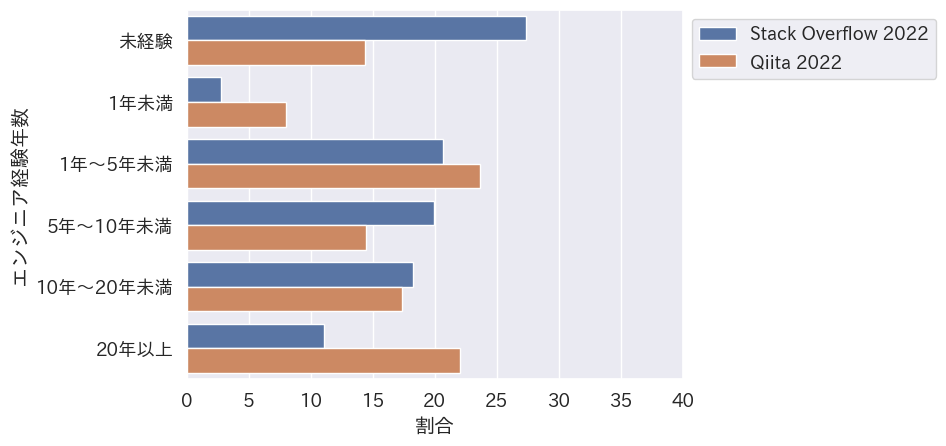

In [5]:
_fig, ax = plt.subplots()

sns.barplot(
    x="割合",
    y="エンジニア経験年数",
    hue="サービス",
    orient='h',
    data=eng_years2.to_pandas()
)

ax.set_xlim(0, 40)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [6]:
so_wanted_langs = pl.DataFrame({
    "ランク": range(1, 11),
    "これから学習したい言語": ["Rust", "Python", "TypeScript", "Go", "JavaScript", "Kotlin", "C++", "SQL", "C#", "Java"], 
    "回答者全体に占める割合（複数回答）": [17.6, 17.59, 17.03, 16.41, 12.98, 8.08, 7.67, 6.51, 6.11, 5.6]
})

so_wanted_langs

shape: (10, 3)
┌─────────┬────────────────────────┬────────────────────────────────────┐
│ ランク  ┆ これから学習したい言語 ┆ 回答者全体に占める割合（複数回答） │
│ ---     ┆ ---                    ┆ ---                                │
│ i64     ┆ str                    ┆ f64                                │
╞═════════╪════════════════════════╪════════════════════════════════════╡
│ 1       ┆ Rust                   ┆ 17.6                               │
│ 2       ┆ Python                 ┆ 17.59                              │
│ 3       ┆ TypeScript             ┆ 17.03                              │
│ 4       ┆ Go                     ┆ 16.41                              │
│ ...     ┆ ...                    ┆ ...                                │
│ 7       ┆ C++                    ┆ 7.67                               │
│ 8       ┆ SQL                    ┆ 6.51                               │
│ 9       ┆ C#                     ┆ 6.11                               │
│ 10      ┆ Java                   ┆ 5.6                                │
└─────────┴────────────────────────┴────────────────────────────────────┘

<AxesSubplot: xlabel='回答者全体に占める割合（複数回答）', ylabel='これから学習したい言語'>

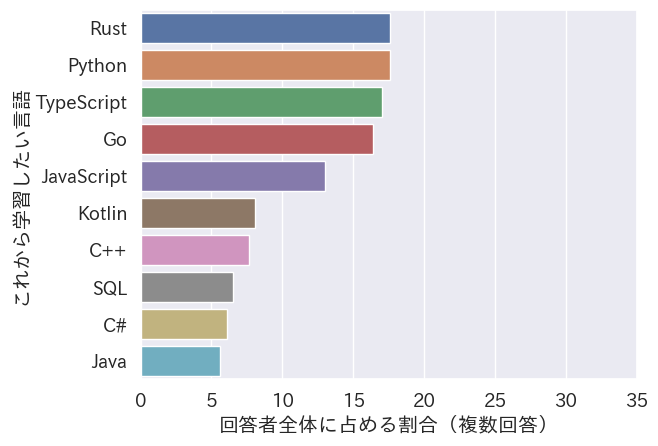

In [7]:
_fig, ax = plt.subplots()
ax.set_xlim(0, 35)

sns.barplot(
    x="回答者全体に占める割合（複数回答）",
    y="これから学習したい言語",
    orient='h',
    data=so_wanted_langs.to_pandas(),
    ax=ax
)

In [8]:
qiita_n = 2756
qiita_langs = ["Python", "Go", "Rust", "TypeScript", "JavaScript", "Swift", "Java", "Ruby", "SQL", "Kotlin"]
qiita_nums = [823, 704, 567, 508, 419, 293, 282, 281, 281, 272]

qiita_wanted_langs = pl.DataFrame({
    "ランク": range(1, 11),
    "これから学習したい言語": qiita_langs,
    "回答者全体に占める割合（複数回答）": [round(n / qiita_n * 100, 2) for n in qiita_nums]
})

qiita_wanted_langs

shape: (10, 3)
┌─────────┬────────────────────────┬────────────────────────────────────┐
│ ランク  ┆ これから学習したい言語 ┆ 回答者全体に占める割合（複数回答） │
│ ---     ┆ ---                    ┆ ---                                │
│ i64     ┆ str                    ┆ f64                                │
╞═════════╪════════════════════════╪════════════════════════════════════╡
│ 1       ┆ Python                 ┆ 29.86                              │
│ 2       ┆ Go                     ┆ 25.54                              │
│ 3       ┆ Rust                   ┆ 20.57                              │
│ 4       ┆ TypeScript             ┆ 18.43                              │
│ ...     ┆ ...                    ┆ ...                                │
│ 7       ┆ Java                   ┆ 10.23                              │
│ 8       ┆ Ruby                   ┆ 10.2                               │
│ 9       ┆ SQL                    ┆ 10.2                               │
│ 10      ┆ Kotlin                 ┆ 9.87                               │
└─────────┴────────────────────────┴────────────────────────────────────┘

<AxesSubplot: xlabel='回答者全体に占める割合（複数回答）', ylabel='これから学習したい言語'>

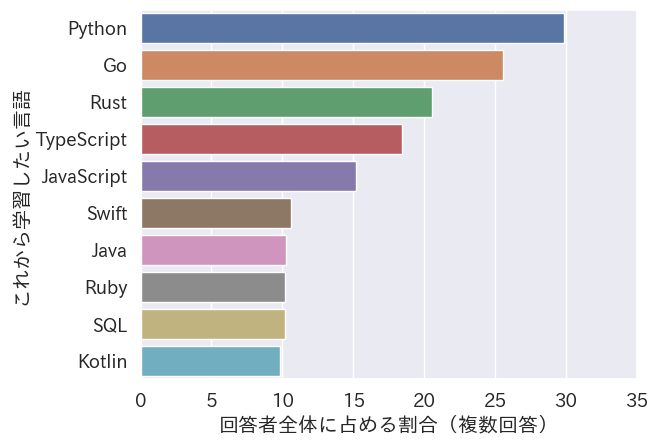

In [9]:
_fig, ax = plt.subplots()
ax.set_xlim(0, 35)

sns.barplot(
    x="回答者全体に占める割合（複数回答）",
    y="これから学習したい言語",
    orient='h',
    data=qiita_wanted_langs.to_pandas()
)

In [10]:
so_editors = [
    "Visual Studio Code",
    "Visual Studio",
    "IntelliJ",
    "Notepad++",
    "Vim",
    "Android Studio",
    "PyCharm",
    "Sublime Text",
    "Eclipse",
    "IPython/Jupyter"
]
so_nums = [
    74.48,
    32.15,
    27.97,
    27.71,
    23.34,
    19.8,
    17.24,
    16.59,
    12.57,
    11.61
]

so_popular_editors = pl.DataFrame({
    "ランク": range(1, 11),
    "開発で使用しているエディタ": so_editors, 
    "回答者全体に占める割合（複数回答）": so_nums,
})

so_popular_editors

shape: (10, 3)
┌─────────┬────────────────────────────┬────────────────────────────────────┐
│ ランク  ┆ 開発で使用しているエディタ ┆ 回答者全体に占める割合（複数回答） │
│ ---     ┆ ---                        ┆ ---                                │
│ i64     ┆ str                        ┆ f64                                │
╞═════════╪════════════════════════════╪════════════════════════════════════╡
│ 1       ┆ Visual Studio Code         ┆ 74.48                              │
│ 2       ┆ Visual Studio              ┆ 32.15                              │
│ 3       ┆ IntelliJ                   ┆ 27.97                              │
│ 4       ┆ Notepad++                  ┆ 27.71                              │
│ ...     ┆ ...                        ┆ ...                                │
│ 7       ┆ PyCharm                    ┆ 17.24                              │
│ 8       ┆ Sublime Text               ┆ 16.59                              │
│ 9       ┆ Eclipse                    ┆ 12.57                              │
│ 10      ┆ IPython/Jupyter            ┆ 11.61                              │
└─────────┴────────────────────────────┴────────────────────────────────────┘

<AxesSubplot: xlabel='回答者全体に占める割合（複数回答）', ylabel='開発で使用しているエディタ'>

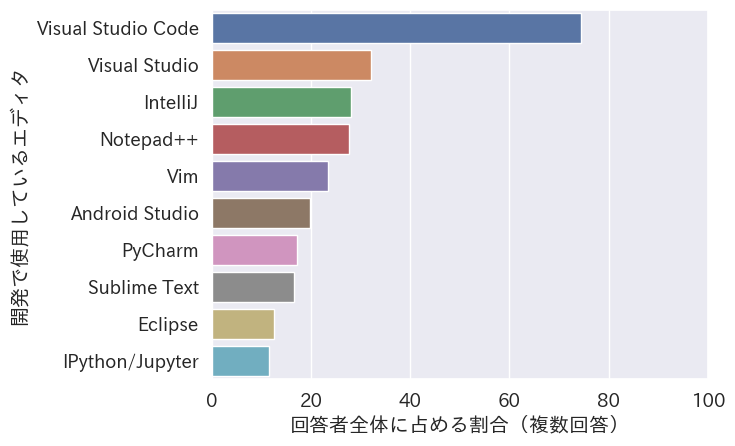

In [11]:
_fig, ax = plt.subplots()
ax.set_xlim(0, 100)

sns.barplot(
    x="回答者全体に占める割合（複数回答）",
    y="開発で使用しているエディタ",
    orient='h',
    data=so_popular_editors.to_pandas()
)

In [12]:
qiita_n = 2377
qiita_editors = [
    "Visual Studio Code",
    "サクラエディタ",
    "Vim",
    "Visual Studio",
    "JetBrains IDE",
    "Eclipse",
    "秀丸エディタ",
    "Xcode",
    "Atom",
    "Sublime Text"
]
qiita_nums = [
    1937,
    556,
    524,
    508,
    308,
    281,
    207,
    191,
    160,
    112
]

qiita_popular_editors = pl.DataFrame({
    "ランク": range(1, 11),
    "開発で使用しているエディタ": qiita_editors,
    "回答者全体に占める割合（複数回答）": [round(n / qiita_n * 100, 2) for n in qiita_nums]
})

qiita_popular_editors

shape: (10, 3)
┌─────────┬────────────────────────────┬────────────────────────────────────┐
│ ランク  ┆ 開発で使用しているエディタ ┆ 回答者全体に占める割合（複数回答） │
│ ---     ┆ ---                        ┆ ---                                │
│ i64     ┆ str                        ┆ f64                                │
╞═════════╪════════════════════════════╪════════════════════════════════════╡
│ 1       ┆ Visual Studio Code         ┆ 81.49                              │
│ 2       ┆ サクラエディタ             ┆ 23.39                              │
│ 3       ┆ Vim                        ┆ 22.04                              │
│ 4       ┆ Visual Studio              ┆ 21.37                              │
│ ...     ┆ ...                        ┆ ...                                │
│ 7       ┆ 秀丸エディタ               ┆ 8.71                               │
│ 8       ┆ Xcode                      ┆ 8.04                               │
│ 9       ┆ Atom                       ┆ 6.73                               │
│ 10      ┆ Sublime Text               ┆ 4.71                               │
└─────────┴────────────────────────────┴────────────────────────────────────┘

<AxesSubplot: xlabel='回答者全体に占める割合（複数回答）', ylabel='開発で使用しているエディタ'>

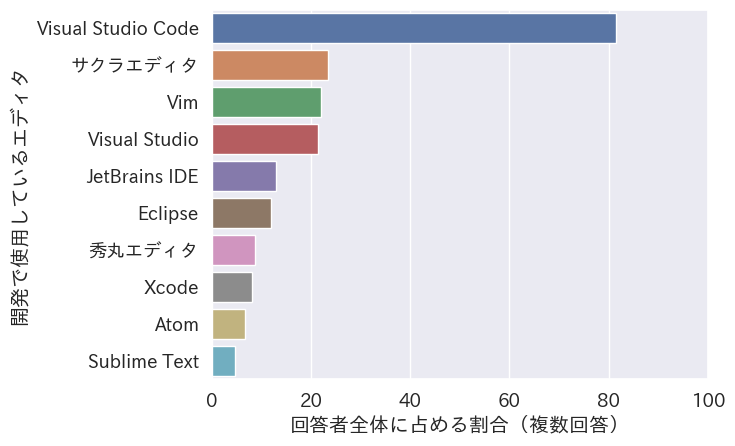

In [13]:
_fig, ax = plt.subplots()
ax.set_xlim(0, 100)

sns.barplot(
    x="回答者全体に占める割合（複数回答）",
    y="開発で使用しているエディタ",
    orient='h',
    data=qiita_popular_editors.to_pandas()
)

In [14]:
selected_editors = so_popular_editors.filter(
    pl.col("開発で使用しているエディタ").is_in([
        "Visual Studio Code",
        "Visual Studio",
        "Eclipse",
        "Vim",
        "Notepad++",
    ])
)
so_selected_editors = selected_editors.select([
    pl.col("開発で使用しているエディタ").apply(
        lambda x: "Notepad++ or サクラエディタ" if x == "Notepad++" else x
    ),
    pl.col("回答者全体に占める割合（複数回答）").alias("Stack Overflow 2022")
])
so_selected_editors

shape: (5, 2)
┌─────────────────────────────┬─────────────────────┐
│ 開発で使用しているエディタ  ┆ Stack Overflow 2022 │
│ ---                         ┆ ---                 │
│ str                         ┆ f64                 │
╞═════════════════════════════╪═════════════════════╡
│ Visual Studio Code          ┆ 74.48               │
│ Visual Studio               ┆ 32.15               │
│ Notepad++ or サクラエディタ ┆ 27.71               │
│ Vim                         ┆ 23.34               │
│ Eclipse                     ┆ 12.57               │
└─────────────────────────────┴─────────────────────┘

In [15]:
selected_editors = qiita_popular_editors.filter(
    pl.col("開発で使用しているエディタ").is_in([
        "Visual Studio Code",
        "Visual Studio",
        "Eclipse",
        "Vim",
        "サクラエディタ",
    ])
)
qiita_selected_editors = selected_editors.select([
    pl.col("開発で使用しているエディタ").apply(
        lambda x: "Notepad++ or サクラエディタ" if x == "サクラエディタ" else x
    ),
    pl.col("回答者全体に占める割合（複数回答）").alias("Qiita 2022")
])
qiita_selected_editors

shape: (5, 2)
┌─────────────────────────────┬────────────┐
│ 開発で使用しているエディタ  ┆ Qiita 2022 │
│ ---                         ┆ ---        │
│ str                         ┆ f64        │
╞═════════════════════════════╪════════════╡
│ Visual Studio Code          ┆ 81.49      │
│ Notepad++ or サクラエディタ ┆ 23.39      │
│ Vim                         ┆ 22.04      │
│ Visual Studio               ┆ 21.37      │
│ Eclipse                     ┆ 11.82      │
└─────────────────────────────┴────────────┘

In [16]:
selected_editors = so_selected_editors.join(
    qiita_selected_editors, 
    on="開発で使用しているエディタ"
)

selected_editors = selected_editors.melt(
    id_vars="開発で使用しているエディタ",
    value_vars=["Stack Overflow 2022", "Qiita 2022"],
    variable_name="サービス",
    value_name="回答者全体に占める割合（複数回答）"
)

selected_editors = selected_editors.sort("開発で使用しているエディタ")

selected_editors

shape: (10, 3)
┌─────────────────────────────┬─────────────────────┬────────────────────────────────────┐
│ 開発で使用しているエディタ  ┆ サービス            ┆ 回答者全体に占める割合（複数回答） │
│ ---                         ┆ ---                 ┆ ---                                │
│ str                         ┆ str                 ┆ f64                                │
╞═════════════════════════════╪═════════════════════╪════════════════════════════════════╡
│ Eclipse                     ┆ Stack Overflow 2022 ┆ 12.57                              │
│ Eclipse                     ┆ Qiita 2022          ┆ 11.82                              │
│ Notepad++ or サクラエディタ ┆ Stack Overflow 2022 ┆ 27.71                              │
│ Notepad++ or サクラエディタ ┆ Qiita 2022          ┆ 23.39                              │
│ ...                         ┆ ...                 ┆ ...                                │
│ Visual Studio               ┆ Stack Overflow 2022 ┆ 32.15                              │
│ Visual Studio               ┆ Qiita 2022          ┆ 21.37                              │
│ Visual Studio Code          ┆ Stack Overflow 2022 ┆ 74.48                              │
│ Visual Studio Code          ┆ Qiita 2022          ┆ 81.49                              │
└─────────────────────────────┴─────────────────────┴────────────────────────────────────┘

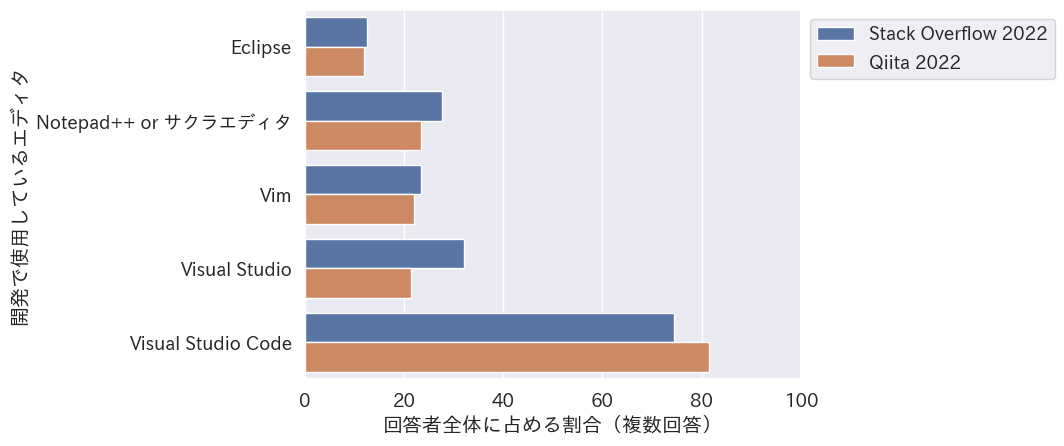

In [17]:
_fig, ax = plt.subplots()

sns.barplot(
    x="回答者全体に占める割合（複数回答）",
    y="開発で使用しているエディタ",
    hue="サービス",
    orient='h',
    data=selected_editors.to_pandas()
)

ax.set_xlim(0, 100)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [18]:
selected_editors = [
    "Visual Studio Code",
    "Visual Studio",
    "JetBrains IDE",
    "Eclipse",
    "Xcode",
    "Atom",
    "Sublime Text"
]

sum = qiita_popular_editors.filter(
    pl.col("開発で使用しているエディタ").is_in(selected_editors)
).get_column("回答者全体に占める割合（複数回答）").sum()

round(sum, 2)

147.12